In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
labels = ["naive", "tree", "map"]
data = pd.concat([pd.read_csv(f"data/tables/table_{label}.csv") for label in labels]).reset_index(drop=True)
data

,n,algorithm,operation,time
0,2,naive,process,500
1,2,naive,answer,110600
2,4,naive,process,600
3,4,naive,answer,182200
4,8,naive,process,700
...,...,...,...,...
91,512,map,answer,1268600
92,1024,map,process,48885367000
93,1024,map,answer,1298600
94,2048,map,process,414384088300


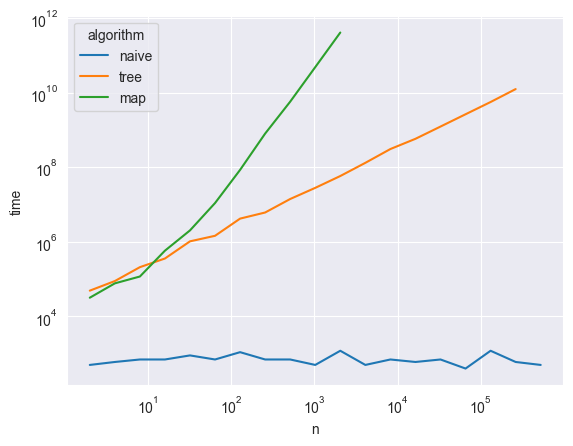

In [5]:
processing = data[data.operation == "process"]
sns.lineplot(data=processing, x='n', y='time', hue="algorithm")
plt.yscale("log")
plt.xscale("log")
plt.show()

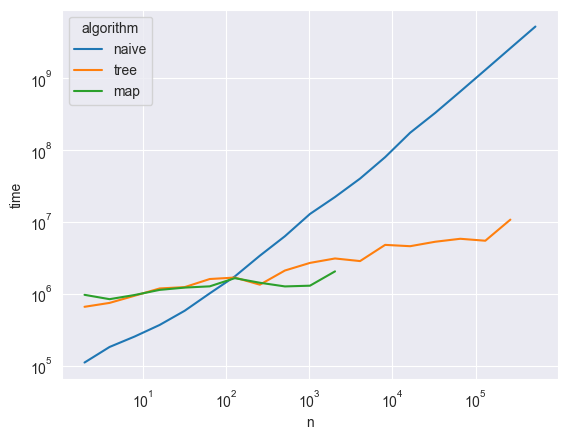

In [6]:
answering = data[data.operation == "answer"]
sns.lineplot(data=answering, x='n', y='time', hue="algorithm")
plt.yscale("log")
plt.xscale("log")
plt.show()